### Data Exploration: TSNE and summary statistics 

### Identification of Gray Sheep using 5-pt review and text: K-Means, DBSCAN, Hierarchical Clustering, NetworkX Graph Analysis (using Cosine Similarity) 

By Kyla Ronellenfitsch - Group C

In [322]:
import pandas as pd
import numpy as np
import json
import gzip
import random
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
import scipy.sparse as sp

In [323]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [324]:
df = getDF('Luxury_Beauty_5.json.gz')

# Data Exploration 

In [325]:
#data structure
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [326]:
df.shape

(34278, 12)

In [327]:
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             17437
reviewerName          0
reviewText           13
summary              15
unixReviewTime        0
vote              27746
image             33661
dtype: int64

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  float64
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   object 
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.2+ MB


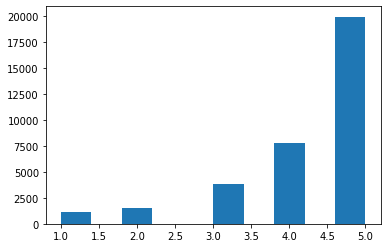

In [329]:
# distribution of 5-pt reviews. Note they are overwhelmingly positive (5)
plt.hist(df["overall"])
plt.show()

In [330]:
#total reviews per customer
df.groupby("reviewerID").count().sort_values(['overall'], ascending=False)

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
reviewerID,,,,,,,,,,,
AJL6HX8O2QLVO,127,127,127,127,1,127,127,127,127,123,0
A1O4PNHACFEDEM,125,125,125,125,0,125,125,125,125,123,0
AJC7TSNP5UAWN,124,124,124,124,0,124,124,124,124,123,0
A2NT1LGR2BYP0I,124,124,124,124,0,124,124,124,124,123,0
A11Z3ANM4PQFMH,124,124,124,124,0,124,124,124,124,123,0
...,...,...,...,...,...,...,...,...,...,...,...
A3BQMWY60QAPRX,4,4,4,4,1,4,4,4,4,1,0
A1DRM3JV6T5O6P,4,4,4,4,1,4,4,4,4,0,0
AVLCKO0ZI8AG,4,4,4,4,2,4,4,4,4,1,0


In [331]:
#total reviews per product 
df.groupby("asin").count().sort_values(['overall'], ascending=False)

,overall,verified,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
asin,,,,,,,,,,,
B001MF3FMW,1221,1221,1221,1221,0,1221,1221,1221,1221,1220,0
B004N2S2JM,774,774,774,774,699,774,774,774,774,94,36
B003OGV7UO,774,774,774,774,699,774,774,774,774,94,36
B0013U0EYI,488,488,488,488,0,488,488,488,488,0,6
B0006PLMFQ,462,462,462,462,321,462,462,461,462,16,4
...,...,...,...,...,...,...,...,...,...,...,...
B000WT9VTA,1,1,1,1,0,1,1,1,1,0,0
B001541W7K,1,1,1,1,0,1,1,1,1,0,0
B007Y55GVC,1,1,1,1,0,1,1,1,1,0,0


# Pivot Table, TSNE and Dimension Reduction

In [198]:
# create pivot table with reviewr id in the rows, product id (asin) in the columns, and the 'overall' rating as values
rating = pd.pivot_table(df, values='overall', index=['reviewerID'], columns = ['asin'])
rating.sort_index(axis=1, inplace=True)
rating=rating.fillna(0)
rating

asin,B00004U9V2,B00005V50B,B000068DWY,B000142FVW,B0001433OU,B00014340I,B00014351Q,B0001435D4,B00014GT8W,B0001EKVCW,...,B01G8UTM3Q,B01GDUM666,B01GDUM6UC,B01GFYWYC6,B01GKH6FTQ,B01GOZ61O8,B01H353A74,B01H353FLA,B01H353HUY,B01HGSJPMW
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0488385844WNV2OWO9X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0916357J9P21ZUYUZO6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0976794S8VOYNT78YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1004703RC79J9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZQKNX6F8S84Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZSYHIK3A3KWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWXG6KBXXC2N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#save index
reviewers=rating.index

In [160]:
rating.sum(axis=1).sort_values(ascending=False)

reviewerID
A2V5R832QCSOMX    391.5
AQY5XBYSENNZQ     390.5
AHN86VFJIJ2JP     368.0
A3091RP0SPZLMN    321.0
A2YKWYC3WQJX5J    293.5
                  ...  
AB42KD37ZMFWN       2.0
A1ODT2GL0ZA2HH      2.0
A3P89WPE2YL003      2.0
A2JGD65DRNR75N      2.0
A3V0AYA9IYS21V      2.0
Length: 3819, dtype: float64

In [83]:
#Create function for TSNE 

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def tsne_fit(data, rate, perplexity, plot = True, return_ = False):
    model = TSNE(learning_rate=rate, perplexity = perplexity)
    transformed = model.fit_transform(data)
    xs = transformed[:,0]
    ys = transformed[:,1]
    if(plot):
        plt.scatter(xs,ys)
        plt.title("Learning Rate: {}, Perplexity: {}".format(rate,perplexity))
        plt.show()
    if return_ == True:
        return(xs,ys)

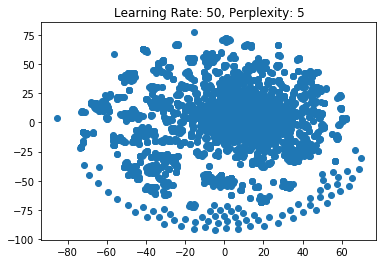

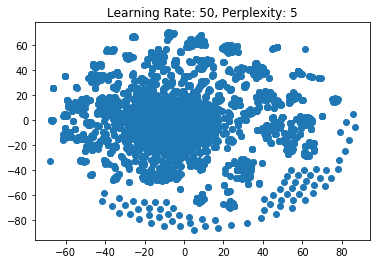

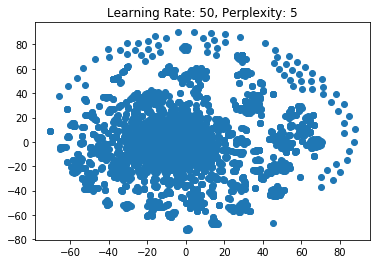

In [37]:
#After experimenting with different learning rates and perplexity values, found that there is one large cluster of
#customers, several smaller groupings, and many outliers. 

py=[5, 15, 25]
for i in py:
    tsne_fit(rating, 50, 5)

# Grey Sheep Identification

Numerous different approaches were used to identify "Gray Sheep Users", due to the challenges posed by data sparsity. 

In [296]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

### K Means

In [170]:
# Plot intertia to determine optimal number of clusters

def plot_inertia(array, start=1, end=10):

    inertia = []
    x_axis = range(start,end+1)

    for i in x_axis:
        kmeans = KMeans(n_clusters = i, random_state = 0)
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)

    return ax

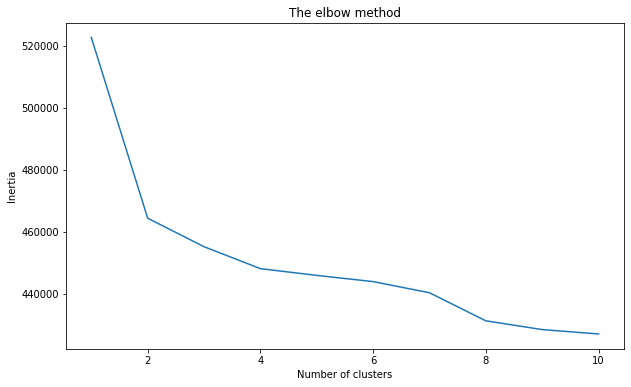

In [171]:
plot_inertia(rating)

In [297]:
# Fit data to K-Means mode with two clusters

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(rating)
klabels=kmeans.predict(rating)

In [210]:
# Clusters are very asymmetric in size, which is what we would expect given TSNE. 

np.unique(klabels, return_counts=True)

(array([0, 1], dtype=int32), array([3434,  385]))

### DBSCAN

In [172]:
# Function to determine optimal epsilon value 

def nearest_neighbour(df):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title('Determination of Optimal Epsilon Value') 
    plt.xlabel('Distance')
    plt.ylabel('Epsilon') 

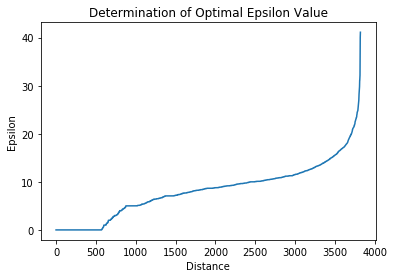

In [173]:
nearest_neighbour(rating)

In [298]:
# Epsilon value of 20 is selected per visualization

db = DBSCAN(eps=20, metric='euclidean', min_samples=5)
db.fit(rating)
db_cluster = np.unique(db.labels_)
db_cluster=db.labels_

In [212]:
# Result in two clusters - one main cluster and outliers. 
np.unique(db_cluster, return_counts=True)

(array([-1,  0]), array([ 113, 3706]))

### Hierarchical Clustering 

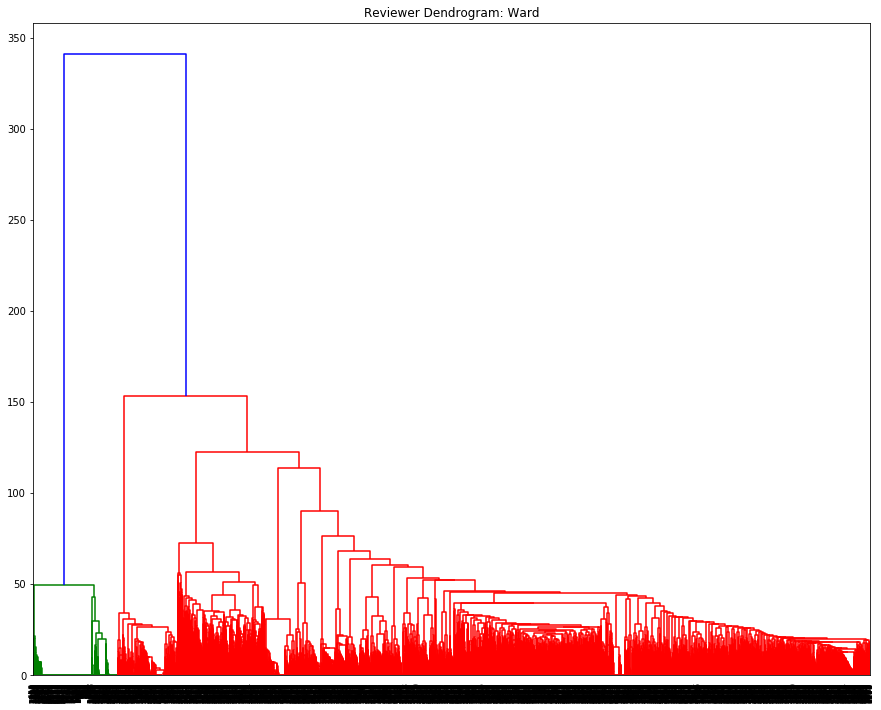

In [299]:
# Show dendrogram using "ward" method

from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.title("Reviewer Dendrogram: Ward")

mergings = linkage(rating, method='ward')

dendrogram(mergings,leaf_rotation=90,leaf_font_size=8)

plt.show()
#print(labels)

In [300]:
# Created 3 clusters based on dendrogram 
labels=fcluster(mergings,150,criterion='distance')

np.unique(labels, return_counts=True)

(array([1, 2, 3], dtype=int32), array([ 384,  276, 3157]))

### Comparison of DBSCAN, K-Means, and Hierarchical

In [301]:
from sklearn.metrics.pairwise import cosine_similarity
rating_sim=cosine_similarity(rating)
rating_sim=np.matrix(rating_sim)

In [302]:
# Create summary df including 

clusters=pd.DataFrame(db_cluster)
clusters['k_cluster']=pd.DataFrame(klabels)
clusters['db_cluster']=pd.DataFrame(db_cluster)
clusters['hier_cluster']=pd.DataFrame(labels)
clusters=clusters.drop(clusters.columns[0], axis=1)

# Using average cosine similarity for each customer in order to gain some insight into how the clusters differ
clusters['cos_sim']=pd.DataFrame(rating_sim.mean(axis=1))

# Adding reviewerID to index 
clusters.index=rating.index

clusters

,k_cluster,db_cluster,hier_cluster,cos_sim
reviewerID,,,,
A0488385844WNV2OWO9X,1,0,3,0.008782
A0916357J9P21ZUYUZO6,1,0,3,0.005433
A0976794S8VOYNT78YEM,0,0,1,0.111852
A1004703RC79J9,1,0,3,0.005772
A100WO06OQR8BQ,1,0,3,0.013841
...,...,...,...,...
AZQKNX6F8S84Q,1,0,3,0.015834
AZSYHIK3A3KWE,0,0,1,0.111852
AZWXG6KBXXC2N,1,0,3,0.008077


<function matplotlib.pyplot.show(*args, **kw)>

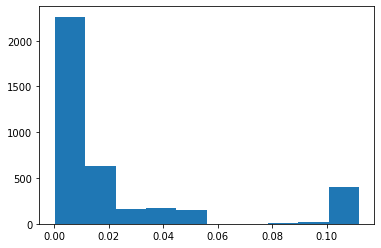

In [217]:
plt.hist(clusters['cos_sim'])
plt.show

In [218]:
#Cosine similarity is significantly larger for cluster 1, the larger segment which we wouldn't expect. 

clusters.groupby('k_cluster').mean()

,db_cluster,hier_cluster,cos_sim
k_cluster,,,
0,-0.032615,2.919627,0.013384
1,-0.002597,1.005195,0.109637


In [219]:
# Cosine similarity is more similar between these two groups

clusters.groupby('db_cluster').mean()

,k_cluster,hier_cluster,cos_sim
db_cluster,,,
-1,0.008850,2.982301,0.014712
0,0.103616,2.718834,0.023343


In [220]:
# There is a range of similarity scores for these groups, but not in the way we would expect. The largest segment is the last similar. 
clusters.groupby('hier_cluster').mean()

,k_cluster,db_cluster,cos_sim
hier_cluster,,,
1,1.000000,-0.002604,0.109637
2,0.000000,0.000000,0.045244
3,0.000317,-0.035454,0.010631


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a52517110>,
      dtype=object)

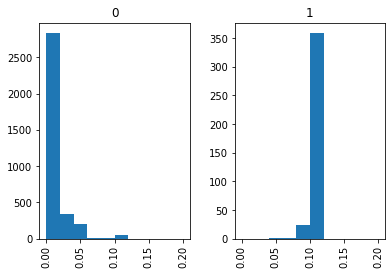

In [221]:
# Visualization of K-Means Clusters

clusters['cos_sim'].hist(by=clusters['k_cluster'], bins=10, range=[0,.2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a35e227d0>,
      dtype=object)

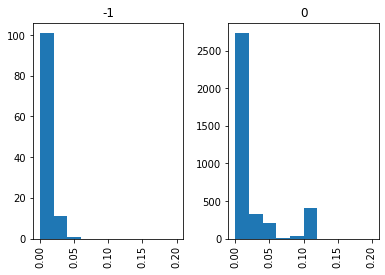

In [222]:
# Visualization of DBSCAN Clusters

clusters['cos_sim'].hist(by=clusters['db_cluster'], bins=10, range=[0,.2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a59828910>,
      dtype=object)

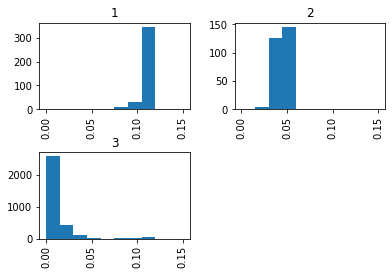

In [303]:
# Visualization of Hierarchical Clusters

clusters['cos_sim'].hist(by=clusters['hier_cluster'], bins=10, range=[0,.15])

In [310]:
df.set_index('reviewerID')
df=df.merge(clusters, left_index=True, right_index=True)
df

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
reviewerID,,,,,,,,,,,
A2HOI48JK8838M,5.0,True,"01 5, 2018",B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
A1YIPEY7HX73S7,5.0,True,"04 5, 2017",B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
A2QCGHIJ2TCLVP,5.0,True,"03 27, 2017",B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
A2R4UNHFJBA6PY,5.0,True,"03 20, 2017",B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
A2QCGHIJ2TCLVP,5.0,True,"02 28, 2017",B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
A2CF66KIQ3RKX3,4.0,False,"09 3, 2017",B01GOZ61O8,NaN,Vivian Deliz,I like to use moisturizers and sunscreens that...,Works great as a moisturizer and sunscreen,1504396800,NaN,NaN
A1LKOIZXPQ9VG0,4.0,False,"09 3, 2017",B01GOZ61O8,NaN,Elisa 20,I wouldn't be able to afford this if not asked...,Nice skin care product and sunscreen if you do...,1504396800,NaN,NaN
AV2RWORXTFRJU,1.0,True,"08 25, 2017",B01H353HUY,NaN,Gapeachmama,Did nothing,One Star,1503619200,NaN,NaN


In [318]:
df.groupby("hier_cluster").count().sort_values(['overall'], ascending=False)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,k_cluster,db_cluster,cos_sim
hier_cluster,,,,,,,,,,,,,,,
3,28725,28725,28725,28725,28725,12901,28725,28712,28710,28725,6032,494,28725,28725,28725
1,3401,3401,3401,3401,3401,2370,3401,3401,3401,3401,191,33,3401,3401,3401
2,2141,2141,2141,2141,2141,1564,2141,2141,2141,2141,305,90,2141,2141,2141


In [320]:
#average product per customer for segment 1
3401/384

8.856770833333334

In [321]:
# average product per customer for segment 2
2141/276

7.757246376811594

In [319]:
# average product per customer for cluster 3
28725/3159

9.09306742640076

### Network Analysis

Since the clustering methods did not work as expected, we used a network to manually identify our segments

In [250]:
# create pivot table with reviewer id in the rows, product id (asin) in the columns, and the 'overall' rating as values
rating = pd.pivot_table(df, values='overall', index=['reviewerID'], columns = ['asin'])
rating.sort_index(axis=1, inplace=True)
rating=rating.fillna(0)
rating

asin,B00004U9V2,B00005V50B,B000068DWY,B000142FVW,B0001433OU,B00014340I,B00014351Q,B0001435D4,B00014GT8W,B0001EKVCW,...,B01G8UTM3Q,B01GDUM666,B01GDUM6UC,B01GFYWYC6,B01GKH6FTQ,B01GOZ61O8,B01H353A74,B01H353FLA,B01H353HUY,B01HGSJPMW
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0488385844WNV2OWO9X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0916357J9P21ZUYUZO6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0976794S8VOYNT78YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1004703RC79J9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZQKNX6F8S84Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZSYHIK3A3KWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWXG6KBXXC2N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# Create similarity matrix (same as used earlier in the script), which calculates similarity betwen customers

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
rating_sim=cosine_similarity(rating)
rating_sim=np.matrix(rating_sim)

In [248]:
#rating_csv.columns=list(np.unique(df['reviewerID']))
#rating_csv=pd.DataFrame(rating_sim)
#rating_csv.index=rating.index
#rating_csv.columns=rating.columns
#rating_csv.to_csv("similarity.csv")

In [252]:
# Build a graph using from_numpy_matrix, which treats the similarity matrix as an adjacency matrix for the graph,
# meaning that the edges are weighted by their similarity to other customers. 

from matplotlib import cm
from matplotlib.pyplot import figure
import networkx as nx

G = nx.from_numpy_matrix(rating_sim)

In [253]:
# Removed selfloops, as well as an outlier identified in earlier analysis 

G.remove_edges_from(nx.selfloop_edges(G))
remove = [node for node,degree in dict(G.degree()).items() if degree == 1]
G.remove_nodes_from(remove)
remove2 = list(nx.isolates(G))
G.remove_nodes_from(remove2)

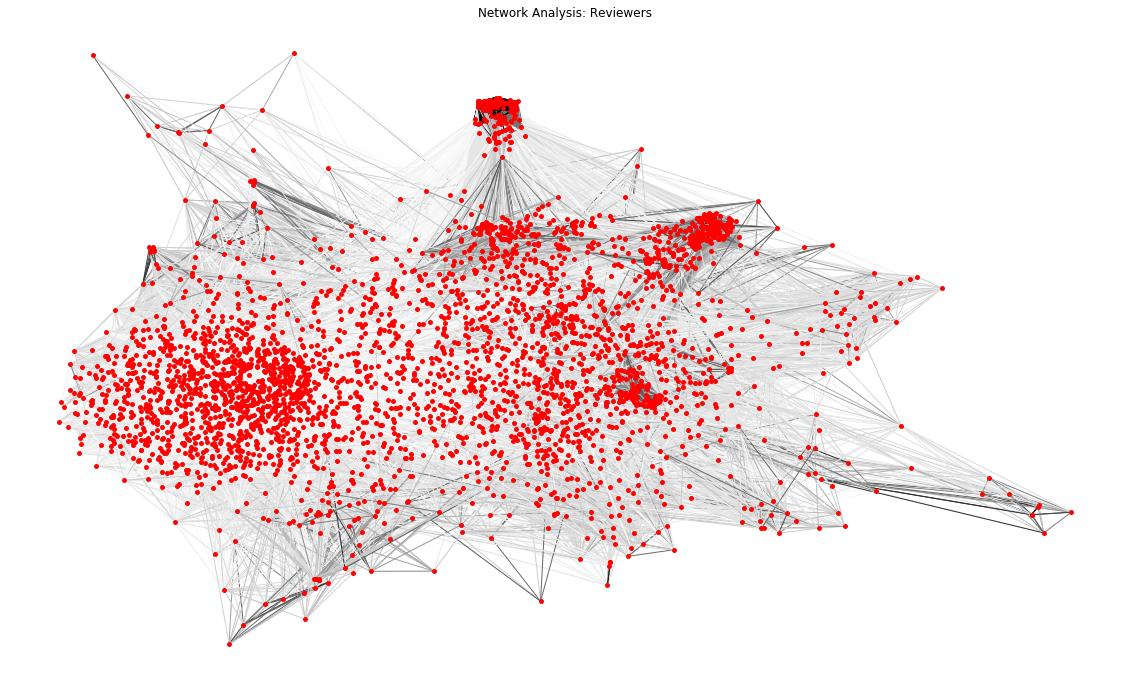

In [254]:
# Visually, we can see exacly what we're looking for: customers with light grey edges, meaning they are relatiely close, 
# and dark grey meaning they are far away. These are the Gray Sheep. 
# We are also able to see "Cold Start" users, with few ratings on the periphery of the graph. 

figure(figsize=(20, 12))
plt.title('Network Analysis: Reviewers')
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=cm.Greys ,node_size=15, node_color='red', hold=True)

In [265]:
# Identify position of the nodes we dropped
print(remove)
print(remove2)

[2492]
[1722]


In [266]:
# Remove index value from rating df
rating.drop(rating.index[[2492]], inplace=True)
rating.drop(rating.index[[1722]], inplace=True)

In [255]:
# calculate betweenness centrality
between_cent=nx.betweenness_centrality(G) 

In [275]:
#save as dataframe
between_cent2=pd.DataFrame.from_dict(between_cent, orient='index')

In [276]:
between_cent2.index=rating.index
between_cent2.columns=["cent"]

In [278]:
# deciles
np.percentile(between_cent2, np.arange(0, 100, 10)) 

array([0.00000000e+00, 0.00000000e+00, 1.13964837e-05, 2.93224630e-05,
       5.55765586e-05, 9.08260881e-05, 1.35869528e-04, 2.08263103e-04,
       3.45920908e-04, 7.19850196e-04])

In [285]:
# After iterating through various degree levels, decided to set threshold for "cold start" customers at <=40 degrees

cold_start = [node for node,degree in dict(G.degree()).items() if degree <= 40]
len(cold_start)

313

In [286]:
# Creat df for cold start customers, add color to be used in next visualization 

cold_cent=[]
for i in cold_start: 
    x=between_cent2.iloc[i]
    cold_cent.append(x)
    
cold_cent=pd.DataFrame(cold_cent)

cold_cent['color']="green"
cold_cent.columns=["cent","color"]
cold_cent['group']="cold_start"
cold_cent

,cent,color,group
A1047EDJ84IMAS,0.000020,green,cold_start
A10H63KUGJEPAJ,0.000014,green,cold_start
A11A05XL3VUOUQ,0.000060,green,cold_start
A11J81ZI9KAERU,0.000001,green,cold_start
A11JXAJHP7KESY,0.000140,green,cold_start
...,...,...,...
AX5Y4X8GRVS6V,0.002352,green,cold_start
AXNJFYJRDK7CJ,0.000127,green,cold_start
AXO2QG19806ER,0.000071,green,cold_start
AY4PKA215Z3G7,0.000016,green,cold_start


In [287]:
np.percentile(cold_cent['cent'], np.arange(0, 100, 10)) 

array([0.00000000e+00, 0.00000000e+00, 8.02824301e-06, 1.57254472e-05,
       2.27591236e-05, 3.26072376e-05, 5.27601519e-05, 8.18014640e-05,
       1.40800029e-04, 3.04663212e-04])

In [288]:
# Create df of remaining customers 

other_cent=between_cent2
other_cent=other_cent.drop(other_cent.index[cold_start])
other_cent.columns=['cent']

# Find 90th percentile for remaining customers 
ninety=np.percentile(other_cent, 90) 

In [289]:
# Define gray sheep as remaining customers who are at or above the 90th percentile

gray_sheep=other_cent[other_cent.cent >= ninety]
gray_sheep['color']="yellow"
gray_sheep.columns=["cent",'color']
gray_sheep['group']="gray_sheep"

gray_sheep

/Users/kylaronellenfitsch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kylaronellenfitsch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cent,color,group
reviewerID,,,
A0488385844WNV2OWO9X,0.000845,yellow,gray_sheep
A100WO06OQR8BQ,0.000815,yellow,gray_sheep
A10NK3J44E66BN,0.000770,yellow,gray_sheep
A11F3YONMF67ML,0.001209,yellow,gray_sheep
A11OTLEDSW8ZXD,0.000838,yellow,gray_sheep
...,...,...,...
AY17MGNAV9K1J,0.001408,yellow,gray_sheep
AYB2RR9WW2OVR,0.001484,yellow,gray_sheep
AYQ14XGJODM9J,0.000766,yellow,gray_sheep


In [290]:
#Create df of typical Amazon customers, those with many close "relationships" to other customers (are neither cold-start nor gray sheep)
typical_customer=other_cent[other_cent.cent < ninety]
typical_customer['color']="red"
typical_customer['group']="typical_customer"
typical_customer

/Users/kylaronellenfitsch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kylaronellenfitsch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cent,color,group
reviewerID,,,
A0916357J9P21ZUYUZO6,0.000043,red,typical_customer
A0976794S8VOYNT78YEM,0.000000,red,typical_customer
A1004703RC79J9,0.000722,red,typical_customer
A100ZQDV7L8PVV,0.000052,red,typical_customer
A102300ZYSDHRR,0.000144,red,typical_customer
...,...,...,...
AZP8VL10DJLG7,0.000000,red,typical_customer
AZQKNX6F8S84Q,0.000172,red,typical_customer
AZSYHIK3A3KWE,0.000000,red,typical_customer


In [291]:
#Create summary dataframe and order list of colors
colors=gray_sheep
colors=colors.append(cold_cent)
colors=colors.append(typical_customer)
colors=colors.sort_index(axis=0)
colors

,cent,color,group
A0488385844WNV2OWO9X,0.000845,yellow,gray_sheep
A0916357J9P21ZUYUZO6,0.000043,red,typical_customer
A0976794S8VOYNT78YEM,0.000000,red,typical_customer
A1004703RC79J9,0.000722,red,typical_customer
A100WO06OQR8BQ,0.000815,yellow,gray_sheep
...,...,...,...
AZQKNX6F8S84Q,0.000172,red,typical_customer
AZSYHIK3A3KWE,0.000000,red,typical_customer
AZWXG6KBXXC2N,0.001094,yellow,gray_sheep
AZYJE40XW6MFG,0.000173,red,typical_customer


In [292]:
color_map=list(colors['color'])

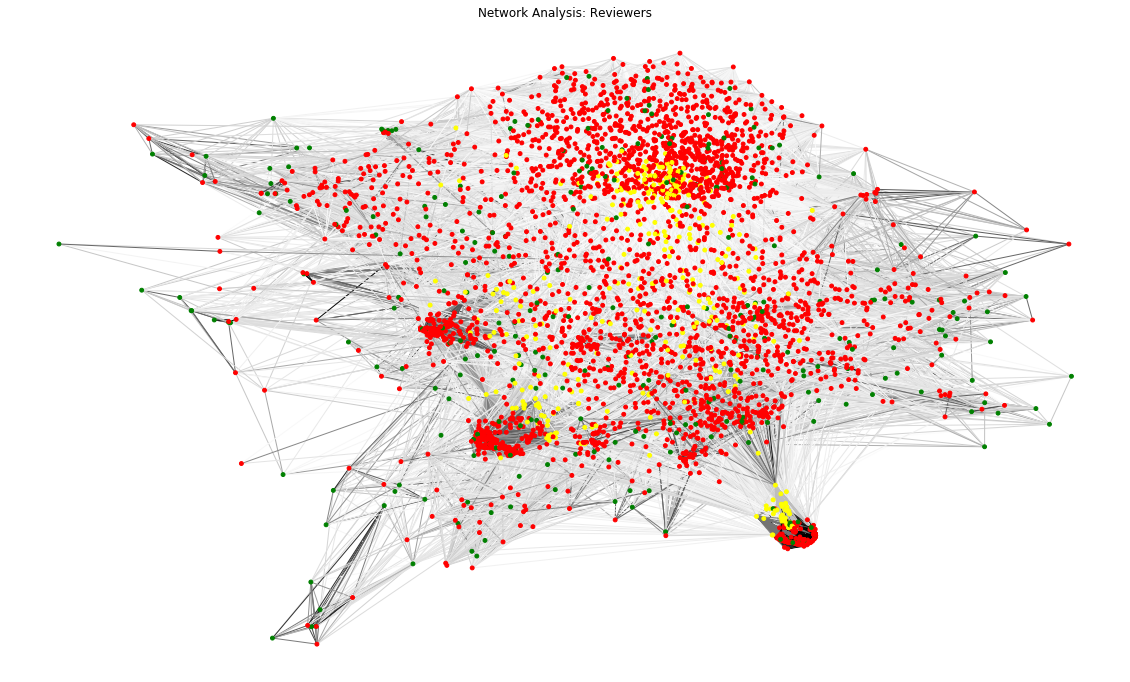

In [293]:
# plot revised network with color-coded nodes. yellow = gray sheep, green = gold start, red = typical customer 

figure(figsize=(20, 12))
plt.title('Network Analysis: Reviewers')
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=cm.Greys ,node_size=15, node_color=color_map, hold=True)


In [295]:
#save customer segments as a csv file, to be uploaded into the lightfm model 
customer_segments=colors.drop(columns=['color'])
customer_segments.to_csv("customer_segments.csv")

Attempted to use Gephi to provide a 3D visualizaiton of the customer network. However, I didn't have enough time to determine how to filter out customers for better visability while also retaining Cold Starts and Gray Sheep.  

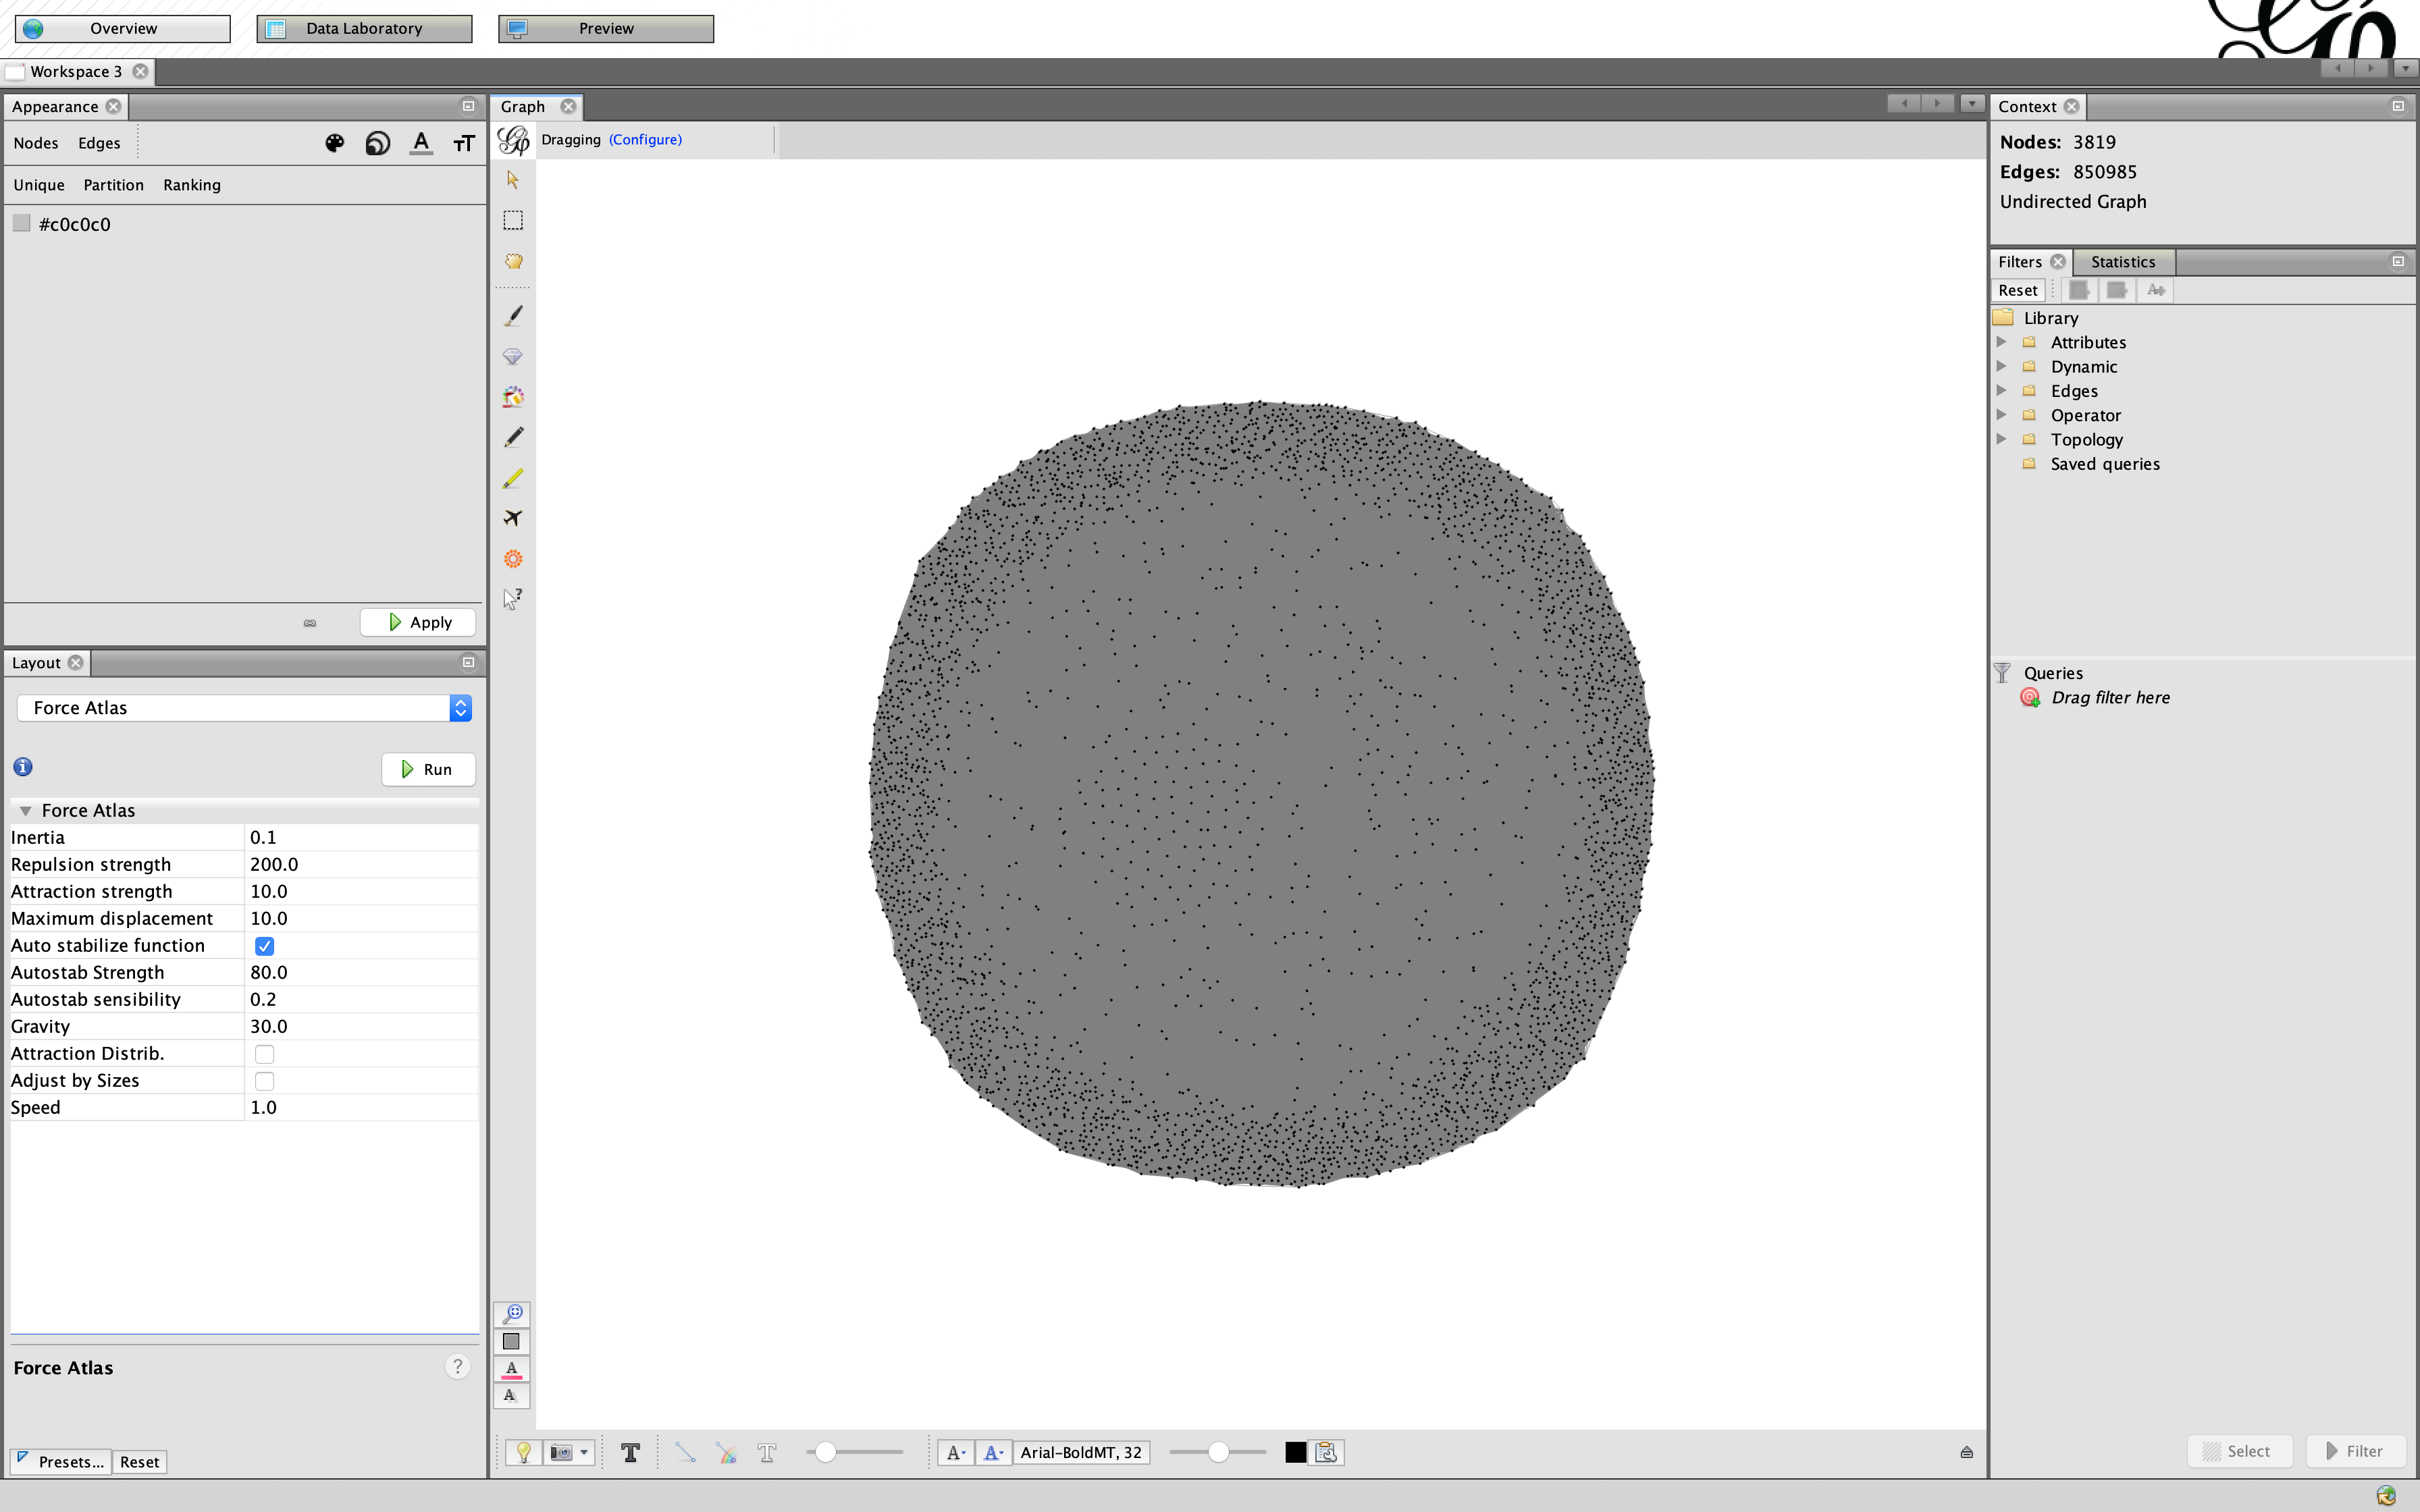

# Clustering using text

Wanted to check if clustering from previous section would work once we use a variable with greater variability. 

In [332]:
from textblob import TextBlob, Word

In [225]:
df['reviewText'] = df['reviewText'].astype(str)

In [226]:
# Used textblob to detect polarity in custoemr reviews.
df['polarity'] = df.reviewText.apply(detect_polarity)

In [227]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,polarity
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,0.300000
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN,0.271250
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN,0.283333
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN,0.312500
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN,0.503810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34273,4.0,False,"09 3, 2017",A2CF66KIQ3RKX3,B01GOZ61O8,NaN,Vivian Deliz,I like to use moisturizers and sunscreens that...,Works great as a moisturizer and sunscreen,1504396800,NaN,NaN,0.268571
34274,4.0,False,"09 3, 2017",A1LKOIZXPQ9VG0,B01GOZ61O8,NaN,Elisa 20,I wouldn't be able to afford this if not asked...,Nice skin care product and sunscreen if you do...,1504396800,NaN,NaN,0.318594
34275,1.0,True,"08 25, 2017",AV2RWORXTFRJU,B01H353HUY,NaN,Gapeachmama,Did nothing,One Star,1503619200,NaN,NaN,0.000000
34276,5.0,False,"07 8, 2017",A22S7D0LP8GRDH,B01H353HUY,NaN,Jacob and Kiki Hantla,I love the Oribe bright blonde radiance spray....,No more brass!,1499472000,NaN,NaN,0.212000


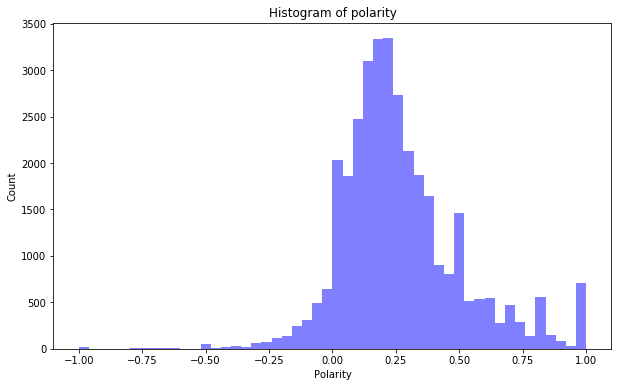

In [228]:
#Visualization of polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

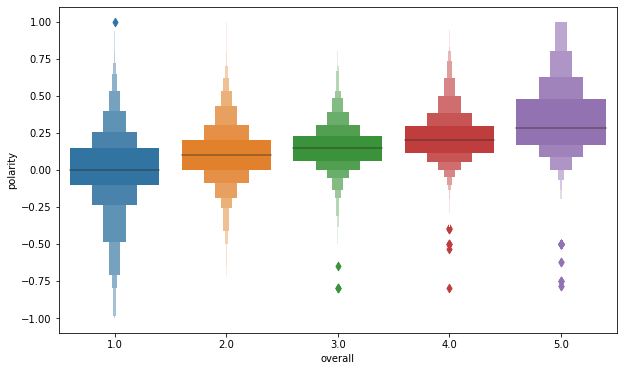

In [229]:
#polarity vs. 5-start review. 
plt.figure(figsize=(10,6))
sns.boxenplot(x='overall', y='polarity', data=df)
plt.show();

In [230]:
# create pivot table with reviewr id in the rows, product id (asin) in the columns, and polarity as values
rating = pd.pivot_table(df, values='polarity', index=['reviewerID'], columns = ['asin'])
rating.sort_index(axis=1, inplace=True)
rating=rating.fillna(0)
rating

asin,B00004U9V2,B00005V50B,B000068DWY,B000142FVW,B0001433OU,B00014340I,B00014351Q,B0001435D4,B00014GT8W,B0001EKVCW,...,B01G8UTM3Q,B01GDUM666,B01GDUM6UC,B01GFYWYC6,B01GKH6FTQ,B01GOZ61O8,B01H353A74,B01H353FLA,B01H353HUY,B01HGSJPMW
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0488385844WNV2OWO9X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0916357J9P21ZUYUZO6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0976794S8VOYNT78YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1004703RC79J9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211607,0.0,...,0.0,0.357449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZQKNX6F8S84Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZSYHIK3A3KWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWXG6KBXXC2N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


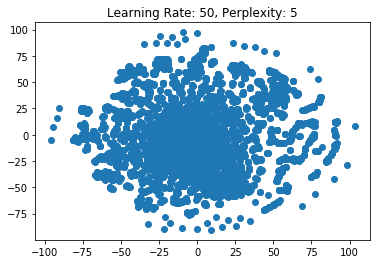

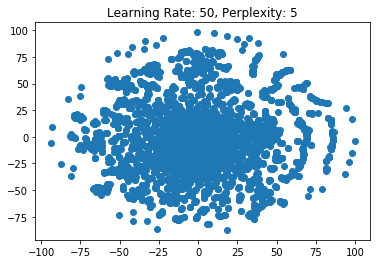

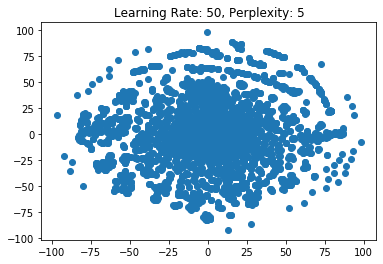

In [126]:
#tsne using polarity scores 

py=[5, 15, 25]
for i in py:
    tsne_fit(rating, 50, 5)

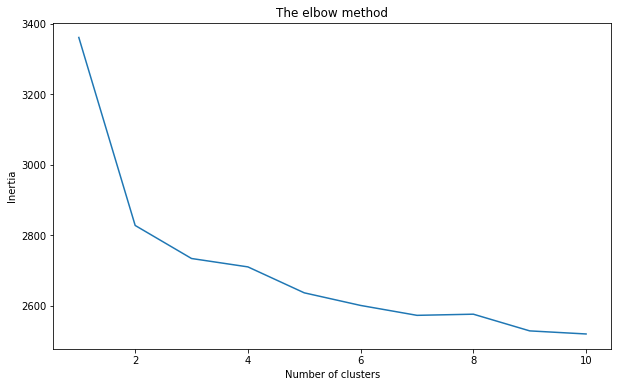

In [192]:
# Inertia for polarity score 
plot_inertia(rating)

In [231]:
# Fit data to K-Means mode with two clusters

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(rating)
klabels=kmeans.predict(rating)

In [232]:
np.unique(klabels, return_counts=True)

(array([0, 1], dtype=int32), array([3574,  245]))

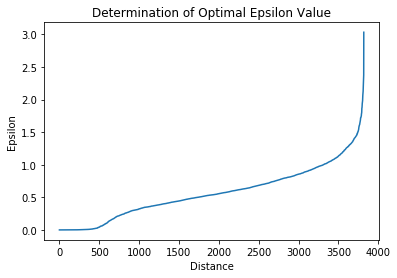

In [141]:
nearest_neighbour(rating)

In [233]:
# Epsilon value of 1.25 is selected per visualization

db = DBSCAN(eps=1.25, metric='euclidean', min_samples=5)
db.fit(rating)
db_cluster = np.unique(db.labels_)
db_cluster=db.labels_

In [234]:
np.unique(db_cluster, return_counts=True)

(array([-1,  0]), array([ 229, 3590]))

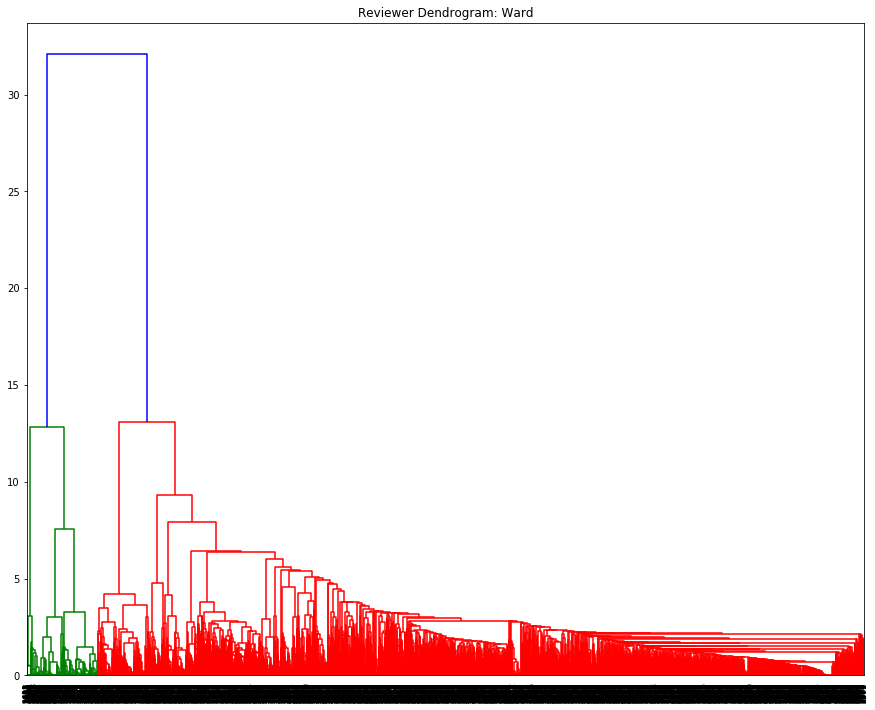

In [235]:
# Construct dendrogram 
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.title("Reviewer Dendrogram: Ward")

mergings = linkage(rating, method='ward')

dendrogram(mergings,leaf_rotation=90,leaf_font_size=8)

plt.show()
#print(labels)

In [236]:
# created two clusters based on dendrogram 

labels=fcluster(mergings,15,criterion='distance')

np.unique(labels, return_counts=True)

(array([1, 2], dtype=int32), array([ 323, 3496]))

In [237]:
#Compute similarity matrix on polarity scores 
from sklearn.metrics.pairwise import cosine_similarity
rating_sim=cosine_similarity(rating)
rating_sim=np.matrix(rating_sim)

In [238]:
# Create summary df 

clusters=pd.DataFrame(db_cluster)
clusters['k_cluster']=pd.DataFrame(klabels)
clusters['db_cluster']=pd.DataFrame(db_cluster)
clusters['hier_cluster']=pd.DataFrame(labels)
clusters=clusters.drop(clusters.columns[0], axis=1)

# Using average cosine similarity for each customer in order to gain some insight into how the clusters differ
clusters['cos_sim']=pd.DataFrame(rating_sim.mean(axis=1))

# Adding reviewerID to index 
clusters.index=rating.index

clusters

,k_cluster,db_cluster,hier_cluster,cos_sim
reviewerID,,,,
A0488385844WNV2OWO9X,0,-1,2,0.005926
A0916357J9P21ZUYUZO6,0,0,2,0.009561
A0976794S8VOYNT78YEM,0,0,2,0.086023
A1004703RC79J9,0,0,2,0.004000
A100WO06OQR8BQ,0,-1,2,0.010902
...,...,...,...,...
AZQKNX6F8S84Q,0,0,2,0.014687
AZSYHIK3A3KWE,0,0,2,0.000000
AZWXG6KBXXC2N,0,0,2,0.006477


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4c074610>,
      dtype=object)

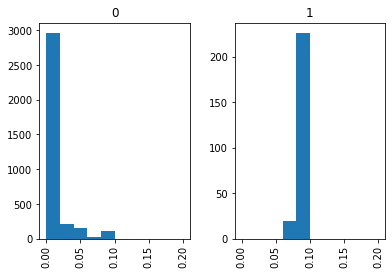

In [242]:
# Visualization of K-Means Clusters

clusters['cos_sim'].hist(by=clusters['k_cluster'], bins=10, range=[0,.2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a465eea90>,
      dtype=object)

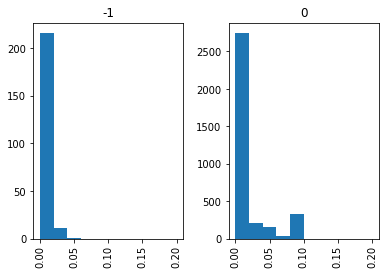

In [243]:
# Visualization of DBSCAN Clusters

clusters['cos_sim'].hist(by=clusters['db_cluster'], bins=10, range=[0,.2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a532e9c50>,
      dtype=object)

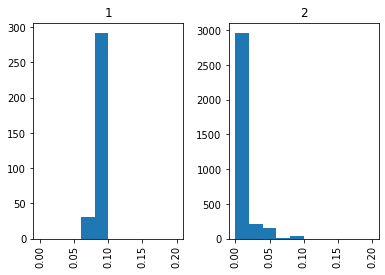

In [244]:
# Visualization of hierarchical cluster 
clusters['cos_sim'].hist(by=clusters['hier_cluster'], bins=10, range=[0,.2])

# Extra text processing - Didn't use in final product

Text processing using Rake and Count Vectorizer

In [20]:
#!pip install rake_nltk

import pandas as pd
import numpy as np
from scipy.sparse import *
from scipy import *
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

from rake_nltk import Rake
import re
import operator

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
df = getDF('Luxury_Beauty_5.json.gz')

In [22]:
# Change reviewText to string 
df['reviewText'] = df['reviewText'].fillna('').apply(str)
df['reviewText'] = df['reviewText'].astype('|S')
df['reviewText'] = df['reviewText'].apply(str)

In [10]:
# Rake function 
def rake_implement(x):
    r = Rake(min_length=1, max_length=6)
    r.extract_keywords_from_text(x) # r.extract_keywords_from_text(<text to process>)
    keywords = r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.
    return keywords[:10]

In [11]:
# Add column with raked words
df['key_words']=df['reviewText'].apply(lambda x: rake_implement(x))

In [12]:
# Change key_words to string
df['key_words'] = df['key_words'].fillna('').apply(str)
df['key_words'] = df['key_words'].astype('|S')
df['key_words'] = df['key_words'].apply(str)

In [13]:
# Vectorize key words 
vectorizer = CountVectorizer()
review_vect = vectorizer.fit_transform(df['key_words'])
review_txt2 = pd.DataFrame(review_vect.toarray(), columns = vectorizer.get_feature_names())

In [109]:
# Remove numeric "words"
# review_txt2=review_txt2.filter(regex='^\D')

In [110]:
review_txt2

,_the,a1r,aa,aaa,aaaa,aal,aam,aand,aarrggghhh,aback,...,zirh,zit,zits,zombie,zone,zones,zoo,zooming,zoya,zwilling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Store as CSR Matrix 
txt_csr=csr_matrix(review_txt2).toarray()
txt_csr.shape

(34278, 16815)

In [112]:
# Scale Matrix 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(txt_csr)
rating_scale = scaler.transform(txt_csr)

In [26]:
# Find the optimal number of components for Truncated SVD
n_comp = [1100,1200] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(txt_csr)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
#plt.plot(n_comp, explained)
#plt.xlabel('Number of components')
#plt.ylabel("Explained Variance")
#plt.title("Plot of Number of components v/s explained variance")
#plt.show()

Number of components = 1100 and explained variance = 0.8406151634557197
Number of components = 1200 and explained variance = 0.8524554666559521


In [113]:
#TruncatedSVD to reduce dimensionality
svd2 = TruncatedSVD(n_components=1200)
txt_svd=svd2.fit(rating_scale).transform(rating_scale)
txt_svd.shape

(34278, 1200)

In [114]:
# Save as DF with products as index 
txt_svd=pd.DataFrame(txt_svd)
txt_svd.index=df["reviewerID"]

In [115]:
txt_svd

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
reviewerID,,,,,,,,,,,,,,,,,,,,,
A2HOI48JK8838M,-0.050376,-0.096519,0.145130,-0.594660,-0.154534,-0.316501,-0.078500,-0.045947,0.004858,-0.142271,...,0.483824,0.670711,-1.591451,1.225096,-0.059389,-0.384239,0.895382,-0.254515,-1.391791,-0.745831
A1YIPEY7HX73S7,-0.036967,-0.162957,0.034886,-0.615962,-0.009901,-0.169418,0.019894,0.297969,-0.101021,-0.148488,...,-0.035674,-0.218132,0.209471,0.311116,-0.645819,0.262667,-0.174051,-0.602466,0.167038,0.125755
A2QCGHIJ2TCLVP,-0.052171,-0.159770,0.052517,-0.392152,-0.123163,-0.227273,-0.056370,-0.024255,-0.056914,-0.139291,...,0.094465,0.067529,-0.252289,0.307488,-0.177728,0.168283,0.036520,-0.179254,-0.172426,0.049127
A2R4UNHFJBA6PY,-0.036515,-0.181051,0.058589,-0.317506,-0.159933,-0.088541,-0.069032,-0.059234,0.027181,-0.069184,...,-0.056526,-0.074456,-0.033518,0.057161,0.000468,-0.137599,0.059265,-0.120437,-0.010367,0.080024
A2QCGHIJ2TCLVP,-0.053277,-0.202095,0.068076,-0.459755,-0.158139,-0.108564,-0.064419,-0.026184,0.072570,0.067515,...,-0.300143,-0.058154,0.241360,0.591071,-0.223419,-0.028569,0.026064,-0.405749,-0.245186,-0.437995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2CF66KIQ3RKX3,-0.028922,-0.185811,0.041701,-0.444176,-0.122800,-0.360342,-0.084545,-0.035543,0.162704,0.449808,...,-0.262437,-0.381528,0.346308,-0.410506,-0.232453,-0.209015,0.646929,0.213692,0.224475,-0.421519
A1LKOIZXPQ9VG0,-0.037376,-0.220027,0.095310,-1.091199,-0.186030,-0.535867,-0.092716,-0.044366,-0.034213,-0.059991,...,-1.894867,-1.109192,0.327657,0.165540,-0.224410,1.789477,-1.571010,-1.319367,2.198619,0.003538
AV2RWORXTFRJU,-0.037466,-0.170392,0.054424,-0.318446,-0.147718,-0.105534,-0.061527,-0.042163,0.022802,-0.065142,...,0.023451,0.171249,0.123114,-0.006065,0.054033,0.006188,-0.014945,-0.047036,-0.088827,0.022846
